# Week 8: Riemann Integrals in multiple Dimensions and Variable Substitution

Demo by Christian Mikkelstrup, Hans Henrik Hermansen, Jakob Lemvig, Karl Johan Måstrup Kristensen, and Magnus Troen

In [1]:
from sympy import *
from dtumathtools import *

init_printing()

## Python Functions for Parametrizations

When we work with change of variables, Python and lambda functions cna be useful for handling SymPy objects. To illustrate how this can be applied we will consider the example

\begin{equation*}
f: \mathbb{R}^3 \to \mathbb{R}, \quad f(x,y,z) = x+y+z
\end{equation*}

\begin{equation*}
\boldsymbol{r}(u,v,w) = \begin{bmatrix} u -v \\ w^2 \\ v(u+w) \end{bmatrix}, \quad u,v,w \in \mathbb{R}
\end{equation*}

We would like to determine $f(\boldsymbol{r}(u,v,w))$.

For this, we now define $f$ as, respectively, a SymPy expression (variable), a standard Python function, and a lambda function.

In [2]:
x,y,z = symbols('x,y,z', real =True)
u,v,w = symbols('u,v,w', real =True)

# The parameter function
r = Matrix([u -v, w**2, v*(u+w)])

# Functions
f_sym = x+y+z 

def f_function(x,y,z):
    return x+y+z

f_lam = lambda x,y,z : x+y+z

As SymPy expression, $f(\boldsymbol{r}(u,v,w))$ can be achieved by

In [3]:
fr_sym = f_sym.subs(zip((x,y,z), r)).simplify()

With the Python and lambda functions we can instead simply do

In [4]:
fr_function = f_function(*r).simplify()
fr_lam = f_lam(*r).simplify()

**This does though require that one remembers `*`!** This tells Python that the coordinates in $\boldsymbol{r}$ are to be given to the function as individual arguments.

In [5]:
fr_sym, fr_function, fr_lam

## Integration of Regions Boudned by Straight Lines

The simplest parameter curve is a straight line. An example of this is the line between the points $(2,0)$ and $(4,4)$:

\begin{equation*}
  L := \Bigl\{(x,y) \in \mathbb{R}^2\ |\ 2\leq x \leq 4 \, \wedge \, y = 2x - 4\Bigr\}
\end{equation*}

parametrized by

\begin{equation*}  
  \begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 2 \\ 0 \end{bmatrix} + u \begin{bmatrix} 2 \\ 4 \end{bmatrix},  
\end{equation*} 

where $u \in [0,1]$. When the parameter $u$ runs through the interval $[0,1]$, the point $(x,y)$ will travel along the line starting at $(2,0)$ and ending at $(4,4)$.

In [6]:
u,v = symbols("u v")
r_L = Matrix([2,0]) + Matrix([2,4]) * u
r_L

⎡2⋅u + 2⎤
⎢       ⎥
⎣  4⋅u  ⎦

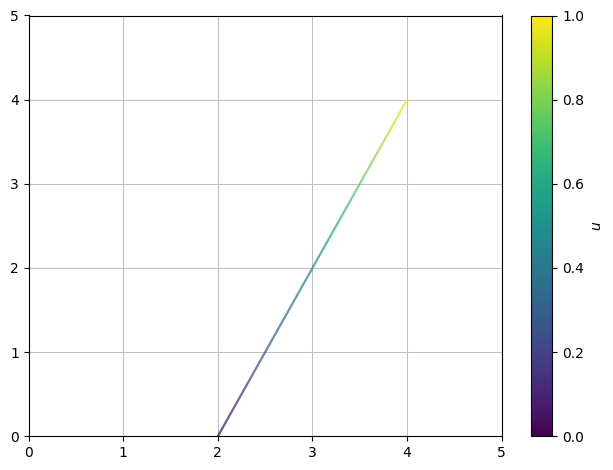

In [7]:
dtuplot.plot_parametric(*r_L, (u,0,1), xlim=(0,5), ylim=(0,5)) # The * symbol in front of r_l is important to remember when one plots parametric curves

We can often simplify our lives a bit when we are to parametrize planar regions by considering line segment. 
Let us have a look at two examples:

### Example

We are to parametrize the region in the plane that is bounded by the lines:  

$y = 1-x$  
$y = 2x+1$  
$x=2$  

which written out as a set of points is

\begin{equation*}
  \Omega:=\Bigl\{(x,y) \in \mathbb{R}^2\ \mid 0 \leq x \leq 2 \, \wedge \, 1 - x\leq y \leq 2x+1\Bigr\}.
\end{equation*}

Let us see how this region looks:

/builds/pgcs/pg14/venv/lib/python3.9/site-packages/spb/series.py:2035: UserWarning: The provided expression contains Boolean functions. In order to plot the expression, the algorithm automatically switched to an adaptive sampling.
  warnings.warn(


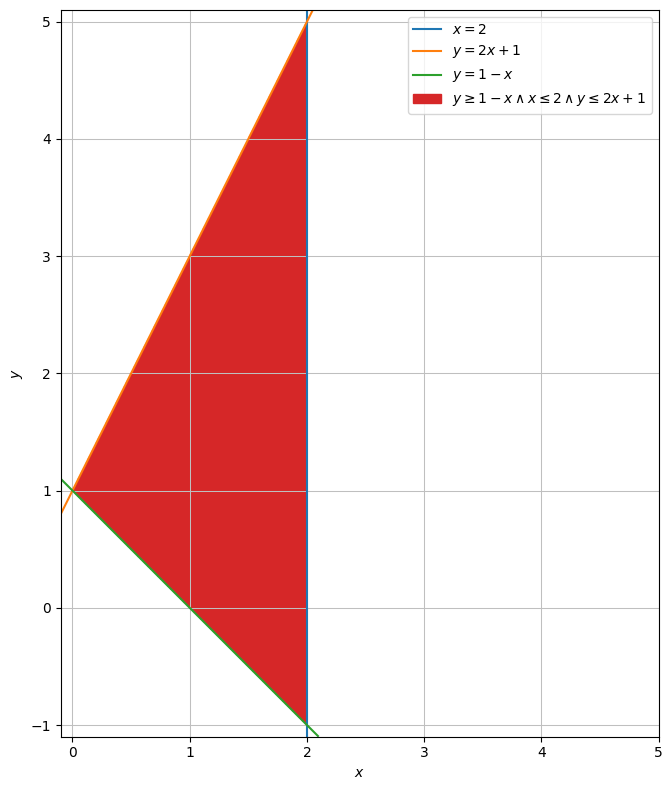

In [8]:
x,y = symbols("x y")
område = dtuplot.plot_implicit(Eq(x,2),Eq(y,2*x+1),Eq(y,1-x),(x <= 2) & (y <= 2*x+1) & (y >= 1-x),(x,-0.1,5),(y,-1.1,5.1),aspect="equal",size=(8,8))

We want to parametrize the entire region. This means that all lines that can be spanned from the graph $y=-x + 1$ to the graph $y=2x + 1$ must be described.
We describe the points at the bottom of the arrows generally with $A = (u,1-u)$.  
The top can be described generally by $B = (u,2u+1)$.  
Thus, the directional vector $AB$ can be described by 

\begin{equation*}
  B-A = \begin{bmatrix} u - u \\ 2u+1 - (1-u) \end{bmatrix} = \begin{bmatrix} 0 \\ 3u \end{bmatrix}
\end{equation*}

/builds/pgcs/pg14/venv/lib/python3.9/site-packages/spb/backends/matplotlib/matplotlib.py:469: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  self._ax.set_xlim(xlim)


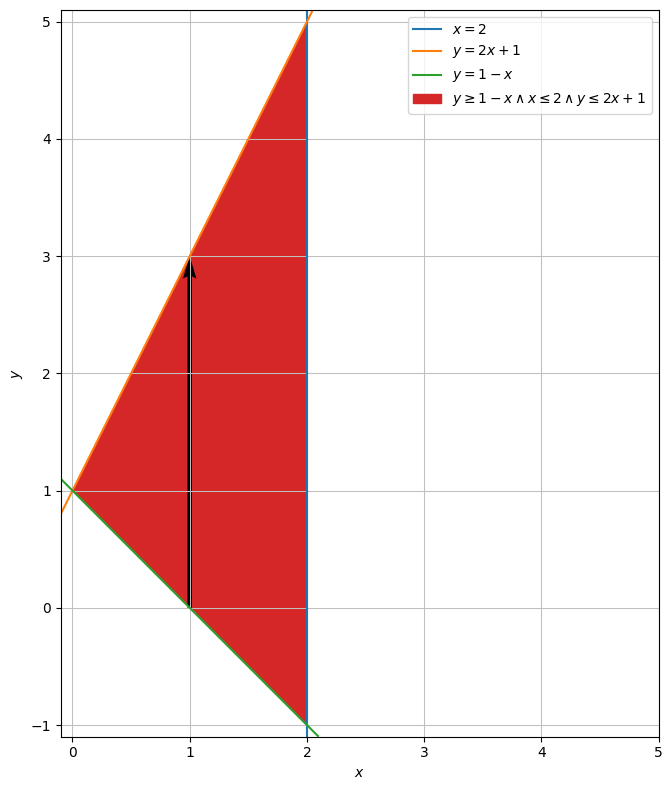

In [9]:
AB = dtuplot.quiver(Matrix([1,0]),Matrix([0,3]),show=False,rendering_kw = {"color" : "black"})

område.extend(AB)
område.show()

We can then parametrize a given line segment between two points on top and on the bottom in the following way:

\begin{equation*} 
\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} u \\ 1-u \end{bmatrix} + v\begin{bmatrix} 0 \\ 3u \end{bmatrix}, \,
v \in [0,1].
\end{equation*} 

If we choose a $u$ that runs through the interval $[0,2]$, then we want to run through all lines from left to right, and in this way cover the entire triangle.
So, the entire region can be parametrized as:

\begin{equation*} 
\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} u \\ 1-u +3vu\end{bmatrix}, \quad
u \in [0,2], \, v \in [0,1]
\end{equation*}

/builds/pgcs/pg14/venv/lib/python3.9/site-packages/spb/backends/matplotlib/matplotlib.py:504: UserWarning: Attempting to set identical low and high zlims makes transformation singular; automatically expanding.
  self._ax.set_zlim(zlim)


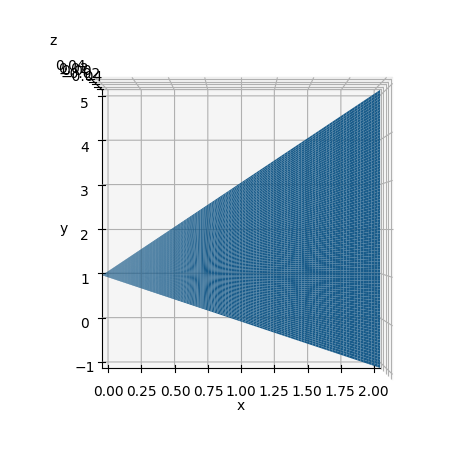

In [10]:
dtuplot.plot3d_parametric_surface(u,1-u+3*u*v,0,(u,0,2),(v,0,1),camera={"elev":90, "azim":-90})
## One can not plot planes in 2D, so we will use the "camera" argument to look at the plot from above

## Regions Bounded by Circles

We will now parametrize the unit circle disc centred at $(2,1)$.
Since we already know how a circle can look, we will directly aim towards finding the line segment that we want to parametrize.

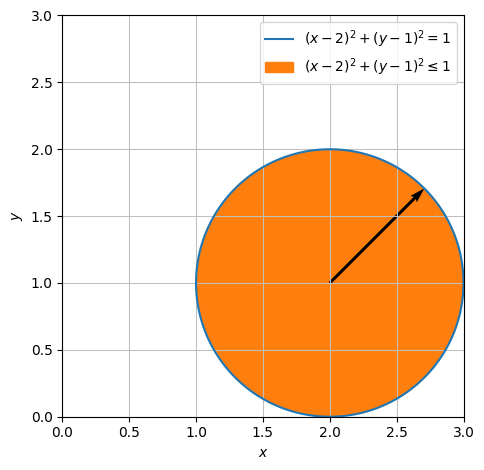

In [11]:
circle = dtuplot.plot_implicit(Eq((x-2) ** 2 + (y-1) ** 2,1),((x-2) ** 2 + (y-1) ** 2 <=1),(x,0,3),(y,0,3), aspect = 'equal',show=False)
AB = dtuplot.quiver(Matrix([2,1]),Matrix([cos(pi /4),sin(pi / 4)]),rendering_kw={"color":"black"}, show=False)
# circle.extend(AB)
(circle + AB).show()

We will now parametrize all lines that stetch from the centre to a point on the circle disc boundary. This is done in the following way. Our  $A$ is now $(2,1)$, our $B$ is $(2 + \cos(u), 1 + \sin(u))$, and so our directional vector $AB$ is $\begin{bmatrix} \cos(u) \\ \sin(u) \end{bmatrix}$. This specific line is thus parametrized as:

\begin{equation*} 
\begin{bmatrix} x \\ y \end{bmatrix} = \begin{bmatrix} 2 \\ 1 \end{bmatrix} + v \begin{bmatrix} \cos(u) \\ \sin(u) \end{bmatrix},\quad \text{for } \ v \in [0,1].
\end{equation*}

If we let $u$ run through the interval $[0,2 \pi]$, we get all lines between the centre and the boundary, and in this way we get all of the circle disc. So, the surface is parametrized with:

\begin{equation*} 
\boldsymbol r_C(u) = \begin{bmatrix} 2 + v \cos(u) \\ 1 + v \sin(u) \end{bmatrix} = \begin{bmatrix} x \\ y \end{bmatrix},\quad \text{for } u \in [0,2\pi],\ v \in [0,1].
\end{equation*}

In [12]:
rC = Matrix([2,1]) + v * Matrix([cos(u),sin(u)])
rC

⎡v⋅cos(u) + 2⎤
⎢            ⎥
⎣v⋅sin(u) + 1⎦

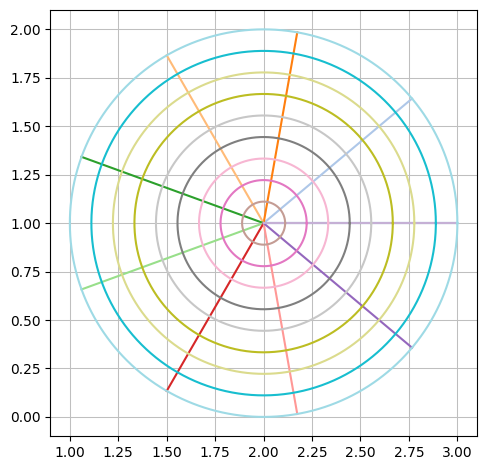

In [13]:
dtuplot.plot_parametric_region(*rC, (u,0,2*pi), (v,0,1), aspect="equal")

For each of these regions in the plane, a plane integral for a given function can be computed.

## Plane Integral

With the function 

\begin{equation*}
f(x,y) = 2xy
\end{equation*}

In [14]:
f = lambda x,y: 2 * x * y
f(x,y)

we wish to compute the plane integral of $f$ over the region that is bounded by our circle, so $\int_C f(x,y)\; \mathrm{d}\pmb{x}$.

Note: With this parametric representation, the axis-parallel square $[0, 2\pi] \times [0, 1]$ in the $(u,v)$ plane is mapped to the circle we integrate over in the $(x,y)$ plane.

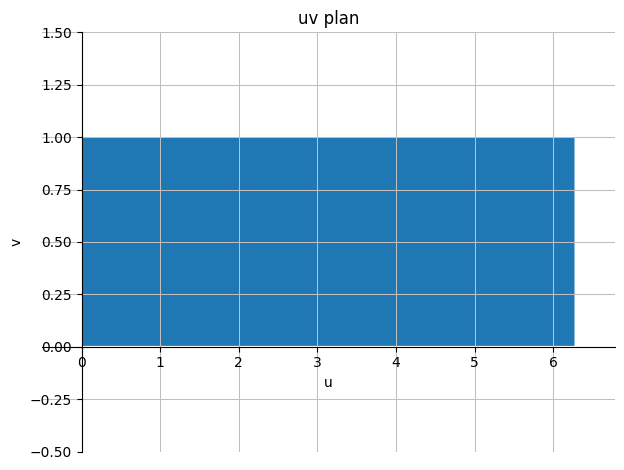

mapped over


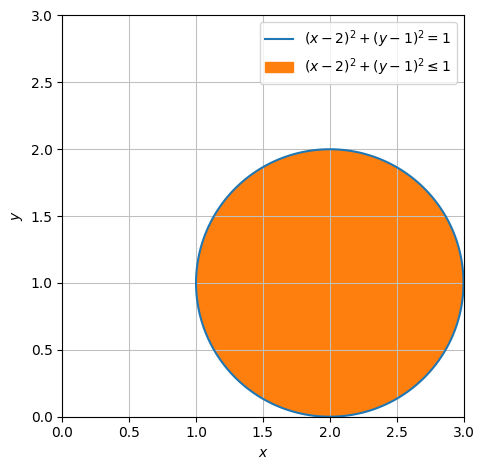

In [15]:
dtuplot.plot_implicit(((x < 2*pi) & (x > 0) & (y > 0) & (y < 1)), (x, -0.5, 2*pi + 0.5), (y, -0.5,1.5),
                      title="uv plan", xlabel="u", ylabel="v", axis_center='auto')

print("mapped over")

circle.show()

Now we will need the absolute value of the Jacobian determinant, which locally measures how much the $(u,v)$ parameter region is deformed when it is undergoing the map $\boldsymbol r_C$. And since there are multiple variables and derivatives, we first set up the Jacobian matrix:

\begin{equation*}
\boldsymbol{J}_{\boldsymbol r_C} = \left[\begin{matrix} \vdots & \vdots \\ \frac{\partial \boldsymbol r(u,v)}{\partial u} &  \frac{\partial \boldsymbol r(u,v)}{\partial v} \\  \vdots & \vdots \end{matrix}\right] = \left[\begin{matrix}\nabla(2 + v\cos\left(u \right))^T\\ \nabla(1 + v\cos\left(u \right))^T\end{matrix}\right]
\end{equation*}

In [16]:
JacobiM = Matrix.hstack(rC.diff(u), rC.diff(v))
JacobiM

⎡-v⋅sin(u)  cos(u)⎤
⎢                 ⎥
⎣v⋅cos(u)   sin(u)⎦

Now we can find the absolute value of the Jacobian determinant $|\det(\boldsymbol J_{\boldsymbol r_C})|$ by

In [17]:
Jacobian = abs(det(JacobiM)).simplify()
Jacobian

The integral of $f$ over $C$ is then according to the change-of-variables theorem given by:

\begin{equation*}
  \int_C f(x,y)\; \mathrm{d}\pmb{x} = \int_{0}^{1} \int_{0}^{2\pi} f(\boldsymbol r_C(u,v))\cdot|\det (\boldsymbol J_{\boldsymbol r_C}) |\;\mathrm{d}u\,\mathrm{d}v = \int_{0}^{1} \int_{0}^{2\pi} f(2+v\cos(u),1+v\sin(u))\cdot|v|\; \mathrm{d}u \,\mathrm{d}v.
\end{equation*}

In [18]:
integrate(f(*rC) * Jacobian,(u,0,2*pi),(v,0,1))

## Volume Integrals: The Weight of a Sphere in $\mathbb{R}^3$

Let

\begin{equation*}
\Omega = \left\{\boldsymbol{x} \in \mathbb{R}^3 \:|\: ||\boldsymbol{x}||_2 \leq 1 \right\}.
\end{equation*}

So, $\Omega$ describes a unit sphere in $\mathbb{R}^3$. Now let

\begin{equation*}
f:\mathbb{R}^3 \to \mathbb{R}, \quad f(\boldsymbol{x}) = 1
\end{equation*}

describe a constant "mass density function" (so, all parts of the sphere are assumed to weight equally much). We wish to determine the mass of the sphere described by $\Omega$, so we are to compute

\begin{equation*}
M =\int_{\Omega} f\; \mathrm{d}\pmb{x}.
\end{equation*}

This requires that we first and foremost must determine a parametrization of the sphere as well as the corresponding Jacobian determinant. The easiest would be to use spherical coordinates as described in the book, but we will try to work our way towards a parametrization based on what we know about the parametrization of a circle.

### Parametrization of a Sphere

In [19]:
u,v,w = symbols('u v w', real = True)

We will use the approach that a sphere can be described as a circle in the $(x,y)$ plane rotated $180$ degrees about the $z$ axis. The circle is parametrized as follows:

\begin{equation*}
\boldsymbol{r}_{circle} = \begin{bmatrix} \cos(u)\\ 0\\ \sin(u) \end{bmatrix}, \quad u\in[0,2\pi].
\end{equation*}

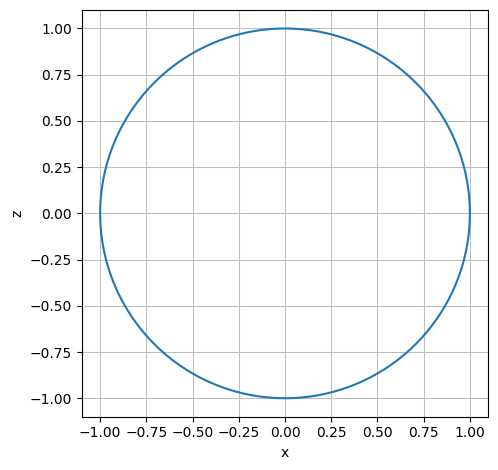

In [20]:
r_circle = Matrix([cos(u), 0, sin(u)])

dtuplot.plot_parametric(r_circle[0], r_circle[2], (u,0,2*pi), use_cm=False,aspect="equal", xlabel = 'x', ylabel = 'z')

From here the circle can be rotated about the $z$ axis using the rotation matrix

\begin{equation*}
R_z = \left[\begin{matrix}\cos{\left(v \right)} & - \sin{\left(v \right)} & 0\\\sin{\left(v \right)} & \cos{\left(v \right)} & 0\\0 & 0 & 1\end{matrix}\right], \quad v\in[0,\pi].
\end{equation*}

This will give a sphere with a radius of $1$.

In [21]:
Rz = Matrix([[cos(v), -sin(v), 0], [sin(v), cos(v), 0], [0, 0, 1]])

r_sphere = simplify(Rz * r_circle)
r_sphere

⎡cos(u)⋅cos(v)⎤
⎢             ⎥
⎢sin(v)⋅cos(u)⎥
⎢             ⎥
⎣   sin(u)    ⎦

Finally we can achieve a solid sphere by introducing the parameter $w \in [0,1]$, which takes care of reaching all radii between $0$ and $1$. So, the final parametrization for the sphere is:

\begin{equation*}
\boldsymbol{r}_{ball} = \left[\begin{matrix}w\cos{\left(u \right)} \cos{\left(v \right)} \\ w\cos{\left(u \right)}\sin{\left(v \right)}\\ w\sin{\left(u \right)}\end{matrix}\right], \quad u\in[0,w\pi], v\in[0,\pi], w\in[0,1].
\end{equation*}

In [22]:
r_ball = r_sphere * w
r_ball

⎡w⋅cos(u)⋅cos(v)⎤
⎢               ⎥
⎢w⋅sin(v)⋅cos(u)⎥
⎢               ⎥
⎣   w⋅sin(u)    ⎦

This can be visualized by looking at $\boldsymbol{r}_{ball}$ with different values of $w$:

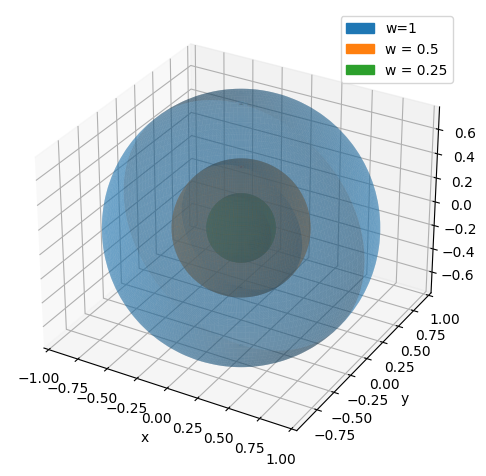

In [23]:
big_ball = dtuplot.plot3d_parametric_surface(*r_ball.subs(w,1), (u, 0, 2*pi), (v, 0, pi), aspect = 'equal', label = 'w=1', rendering_kw = {'alpha': 0.4,}, show = false)
half_ball = dtuplot.plot3d_parametric_surface(*r_ball.subs(w,0.5), (u, 0, 2*pi), (v, 0, pi),label ='w = 0.5', rendering_kw = {'alpha': 0.5}, show = False)
quarter_ball = dtuplot.plot3d_parametric_surface(*r_ball.subs(w,0.25), (u, 0, 2*pi), (v, 0, pi),label ='w = 0.25', show = False)
(big_ball + half_ball + quarter_ball).show()

### The Jacobian Determinant and Density Function

The Jacobian determinant $\det(\boldsymbol{J}_{\boldsymbol r_{ball}})$ is found by 

\begin{equation*}
\boldsymbol{J}_{\boldsymbol r_{ball}} = \left[\begin{matrix} \vdots & \vdots & \vdots \\ \frac{\partial \boldsymbol r_{ball}(u,v,w)}{\partial u} &  \frac{\partial \boldsymbol r_{ball}(u,v,w)}{\partial v} & \frac{\partial \boldsymbol r_{ball}(u,v,w)}{\partial w} \\  \vdots & \vdots & \vdots  \end{matrix}\right] = \left[\begin{matrix}\nabla(w\cos{\left(u \right)} \cos{\left(v \right)})^T\\ \nabla(w \cos{\left(u \right)}\sin{\left(v \right)})^T\\ \nabla(w\sin{\left(u \right)})^T\end{matrix}\right].
\end{equation*}

This can easily be done with `dtumathtools`, where we include the absolute value:

In [24]:
J_ball = r_ball.jacobian([u,v,w])
J_ball

⎡-w⋅sin(u)⋅cos(v)  -w⋅sin(v)⋅cos(u)  cos(u)⋅cos(v)⎤
⎢                                                 ⎥
⎢-w⋅sin(u)⋅sin(v)  w⋅cos(u)⋅cos(v)   sin(v)⋅cos(u)⎥
⎢                                                 ⎥
⎣    w⋅cos(u)             0             sin(u)    ⎦

In [25]:
Jacobian = abs(det(J_ball)).simplify()
Jacobian

The density function in this case is the $1$-function and is thus not necessary to include, but let us define it for the sake of formality:

In [26]:
f = lambda x,y,z: 1

### Determining the Integral

Now we can compute the mass of the sphere by

\begin{equation*}
M =\int_{\Omega} f\, \mathrm{d}\pmb{x} = \int_{0}^{1} \int_{0}^{\pi}\int_{0}^{2\pi} f(\boldsymbol{r}_{ball})J_{\boldsymbol r_{ball}} \;\mathrm du\,\mathrm dv\,\mathrm dw.
\end{equation*}

First we define and simplify the integrand:

In [27]:
integrand = (f(*r_ball) * Jacobian).simplify()
integrand

In [28]:
M = integrate(integrand, (u, 0, 2*pi), (v, 0, pi), (w, 0, 1))
M

Note that $M$ is equal to the volume of a sphere with a radius of $1$, which makes senes since all points have been assigned with mass density of $1$.

### Another Density Function

Now, let

\begin{equation*}
f_1 : \mathbb{R}^3 \to \mathbb{R}, \quad f_1(\boldsymbol{x}) = 2||x||_2
\end{equation*}

describe a new density function.

Let us compute

\begin{equation*}
M_1 = \int_{\Omega} f_1 \mathrm d\pmb{x}
\end{equation*}

In [29]:
f1 = lambda x,y,z: 2*sqrt(x**2 + y**2 + z**2)

In [30]:
integrand = (f1(*r_ball) * Jacobian).simplify()
integrand

In [31]:
M1 = integrate(integrand, (u, 0, 2*pi), (v, 0, pi), (w, 0, 1))
M1